In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
# Load the Excel file into a DataFrame
data = pd.read_excel('INE_IPC.xlsx')



In [3]:
data.rename(columns={
    'Unnamed: 0': 'time',
    '    Índice general': 'index_general',
    '    01 Alimentos y bebidas no alcohólicas': 'food_beverages',
    '    02 Bebidas alcohólicas y tabaco': 'alc_tobacco',
    '    03 Vestido y calzado': 'clothing_footwear',
    '    04 Vivienda, agua, electricidad, gas y otros combustibles': 'housing_utilities',
    '    05 Muebles, artículos del hogar y artículos para el mantenimiento corriente del hogar': 'furniture_household',
    '    06 Sanidad': 'health',
    '    07 Transporte': 'transport',
    '    08 Comunicaciones': 'communications',
    '    09 Ocio y cultura': 'leisure_culture',
    '    10 Enseñanza': 'education',
    '    11 Restaurantes y hoteles': 'restaurants_hotels',
    '    12 Otros bienes y servicios': 'other_goods_services'
}, inplace=True)

data['time'] = pd.to_datetime(data['time'], format='%YM%m')



In [4]:
def plot_inflation(data, inflation_type):
    title = inflation_type
    plt.figure(figsize=(14, 7))

    # Line plot of inflation over time
    plt.subplot(2, 1, 1)
    plt.plot(data['time'], data[inflation_type], marker='o', color='r')
    plt.xlabel('Time')
    plt.ylabel(inflation_type.replace('_', ' ').title())
    plt.title(f'{title} Over Time')
    plt.grid(True)

    # Histogram of inflation
    plt.subplot(2, 1, 2)
    plt.hist(data[inflation_type].dropna(), bins=30, edgecolor='k', color='r')
    plt.xlabel(inflation_type.replace('_', ' ').title())
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {title}')

    plt.tight_layout()
    plt.show()

In [5]:
def plot_acf_pacf(data,variable,lag):
    plt.figure(figsize=(14, 7))
    # Autocorrelation plot
    plt.subplot(2, 1, 1)
    plot_acf(data[variable].dropna(), lags=lag, alpha=0.05, ax=plt.gca())
    plt.xlabel('Lags')
    plt.ylabel('Autocorrelation')
    plt.title(f'Autocorrelation of {variable.replace("_", " ").title()}')
    plt.grid(True)

    #Partial autocorrelation plot
    plt.subplot(2, 1, 2)
    plot_pacf(data[variable].dropna(), lags=lag, alpha=0.05, ax=plt.gca())
    plt.xlabel('Lags')
    plt.ylabel('Autocorrelation')
    plt.title(f'Autocorrelation of {variable.replace("_", " ").title()}')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

In [6]:
### Funcions

# plot lineplot and histogram
def plot_eda(data, feature, color='skyblue', transform_func=None):
    plt.figure(figsize=(18, 6))

    # Line plot of the feature over time
    plt.subplot(1, 3, 1)
    plt.plot(data['time'], data[feature], marker='.', color=color)
    plt.xlabel('Time')
    plt.ylabel(feature.replace('_', ' ').title())
    plt.title(f'{feature.replace("_", " ").title()} Over Time')
    plt.grid(True)

    # Histogram of the feature
    plt.subplot(1, 3, 2)
    plt.hist(data[feature].dropna(), bins=30, edgecolor='k', color=color, density=True)

    mean = data[feature].mean()
    std = data[feature].std()
    x = np.linspace(mean - 3*std, mean + 3*std, 100)
    p = np.exp(-0.5 * ((x - mean) / std)**2) / (std * np.sqrt(2 * np.pi))

    plt.plot(x, p, color='red', linewidth=2)
    plt.xlabel(feature.replace('_', ' ').title())
    plt.ylabel('Density')
    plt.title(f'Histogram + Normal Dist of {feature.replace("_", " ").title()}')
    plt.grid(True)

    plt.tight_layout()
    plt.show()


# plot lineplot and histogram
def plot_eda2(data, feature, color='skyblue', transform_func=None):
    plt.figure(figsize=(24, 6))  # Adjusted for a single row layout
    
    # Line plot of the feature over time
    plt.subplot(1, 4, 1)
    plt.plot(data['time'], data[feature], marker='.', color=color)
    plt.xlabel('Time')
    plt.ylabel(feature.replace('_', ' ').title())
    plt.title(f'{feature.replace("_", " ").title()} Over Time')
    plt.grid(True)
    
    # Histogram of the feature
    plt.subplot(1, 4, 2)
    plt.hist(data[feature].dropna(), bins=30, edgecolor='k', color=color, density=True)
    mean = data[feature].mean()
    std = data[feature].std()
    x = np.linspace(mean - 3*std, mean + 3*std, 100)
    p = np.exp(-0.5 * ((x - mean) / std)**2) / (std * np.sqrt(2 * np.pi))
    plt.plot(x, p, color='red', linewidth=2)
    plt.xlabel(feature.replace('_', ' ').title())
    plt.ylabel('Density')
    plt.title(f'Histogram + Normal Dist of {feature.replace("_", " ").title()}')
    plt.grid(True)
    
    # Autocorrelation plot
    plt.subplot(1, 4, 3)
    plot_acf(data[feature].dropna(), lags=40, alpha=0.05, ax=plt.gca())
    plt.xlabel('Lags')
    plt.ylabel('Autocorrelation')
    plt.title(f'Autocorrelation of {feature.replace("_", " ").title()}')
    plt.grid(True)
    
    # Partial Autocorrelation plot
    plt.subplot(1, 4, 4)
    plot_pacf(data[feature].dropna(), lags=40, alpha=0.05, ax=plt.gca())
    plt.xlabel('Lags')
    plt.ylabel('Partial Autocorrelation')
    plt.title(f'Partial Autocorrelation of {feature.replace("_", " ").title()}')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()



## Original Data General index

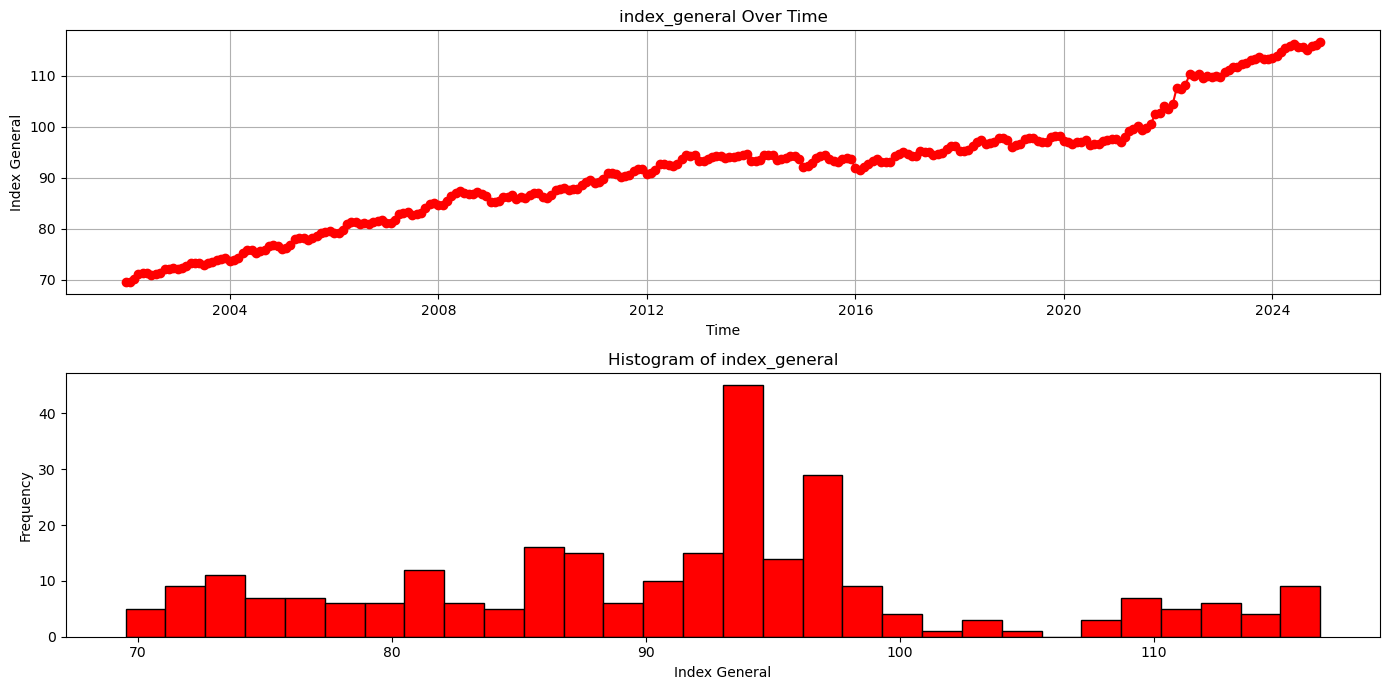

In [7]:
plot_inflation(data,"index_general")

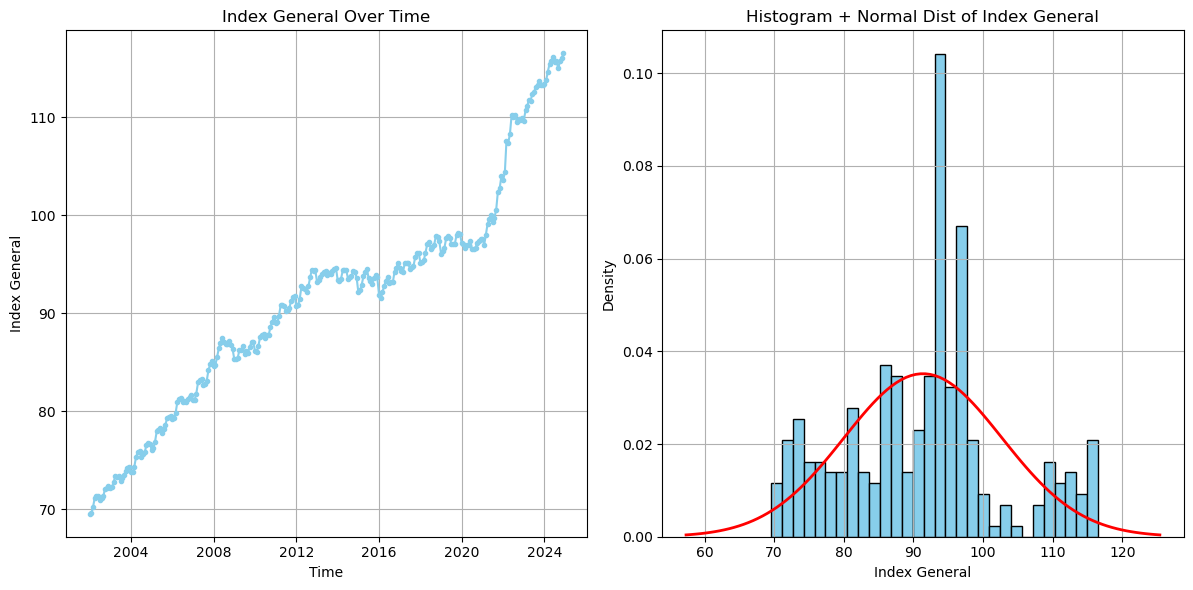

In [8]:
plot_eda(data,"index_general")

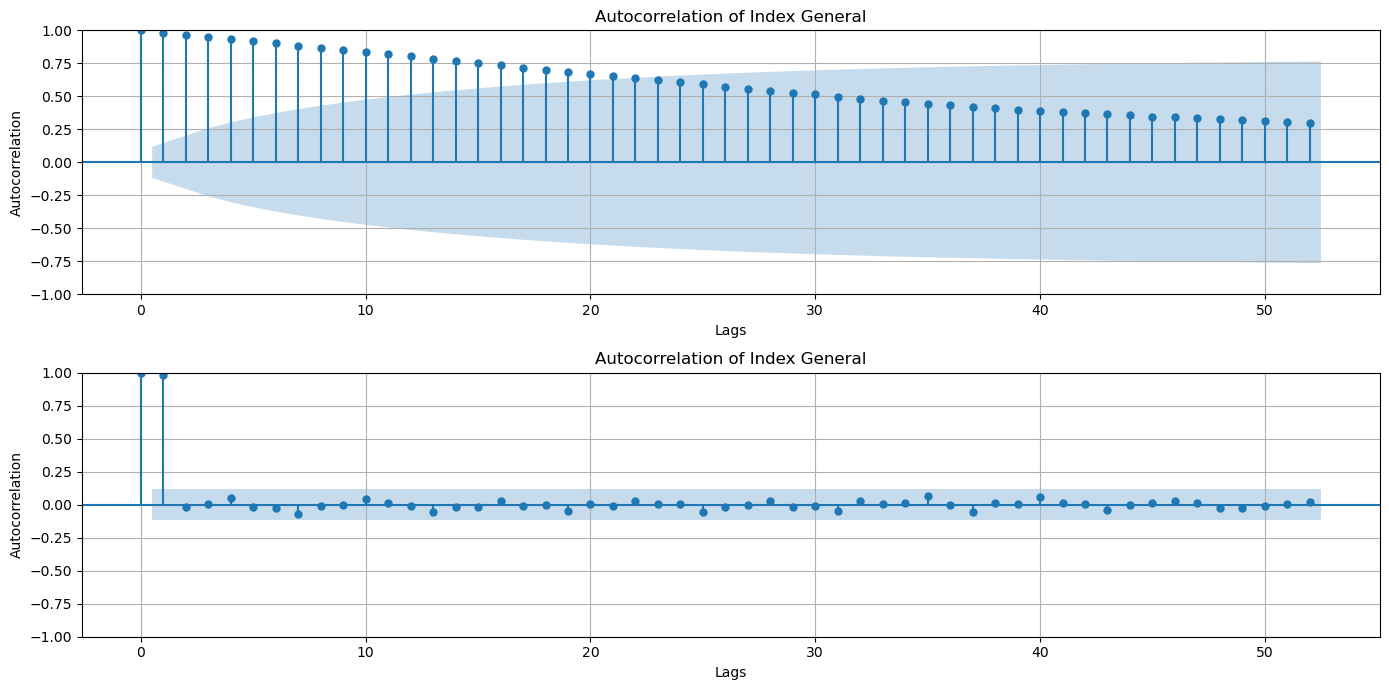

In [9]:
plot_acf_pacf(data,"index_general",52)

## Yearly inflation

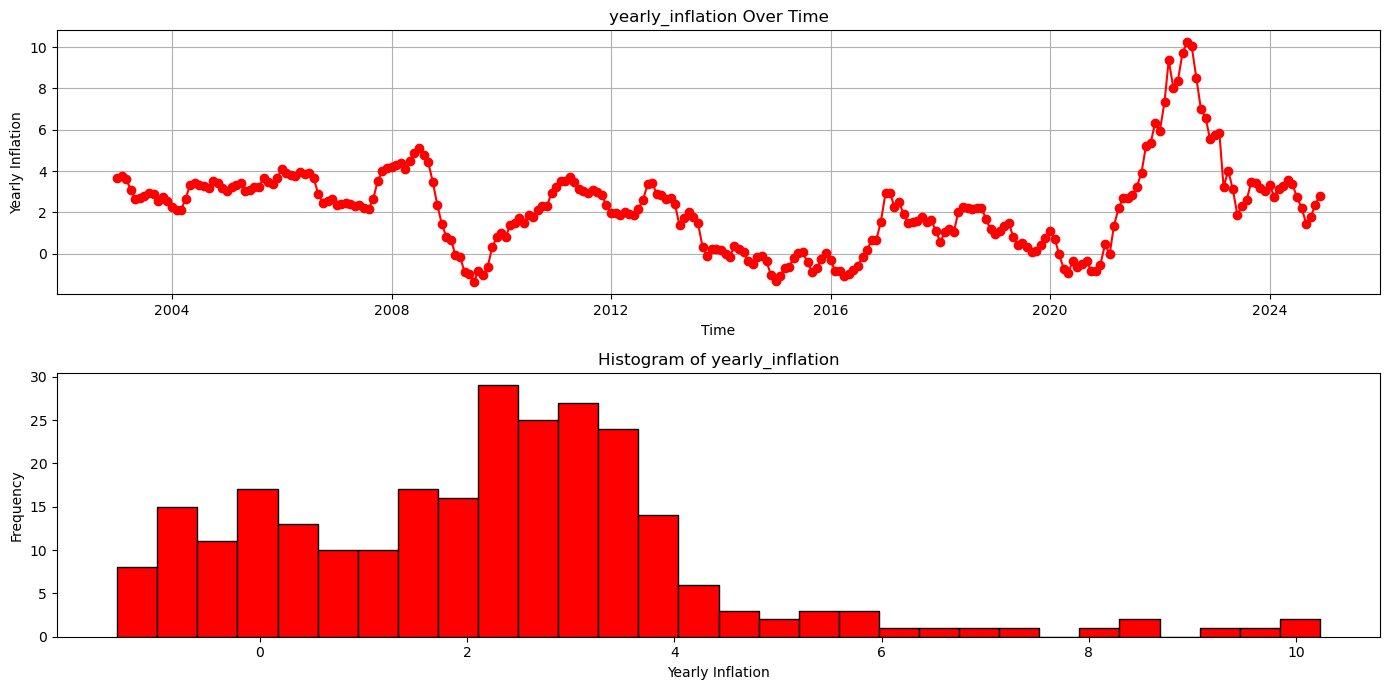

In [10]:
### Check seasonality patterns

# Calculate the monthly inflation
data['yearly_inflation'] = 100 * (np.log(data['index_general']) - np.log(data['index_general'].shift(12)))

# Drop the first row as it will have NaN value for monthly_inflation
data.dropna(subset=['yearly_inflation'], inplace=True)

plot_inflation(data, 'yearly_inflation')

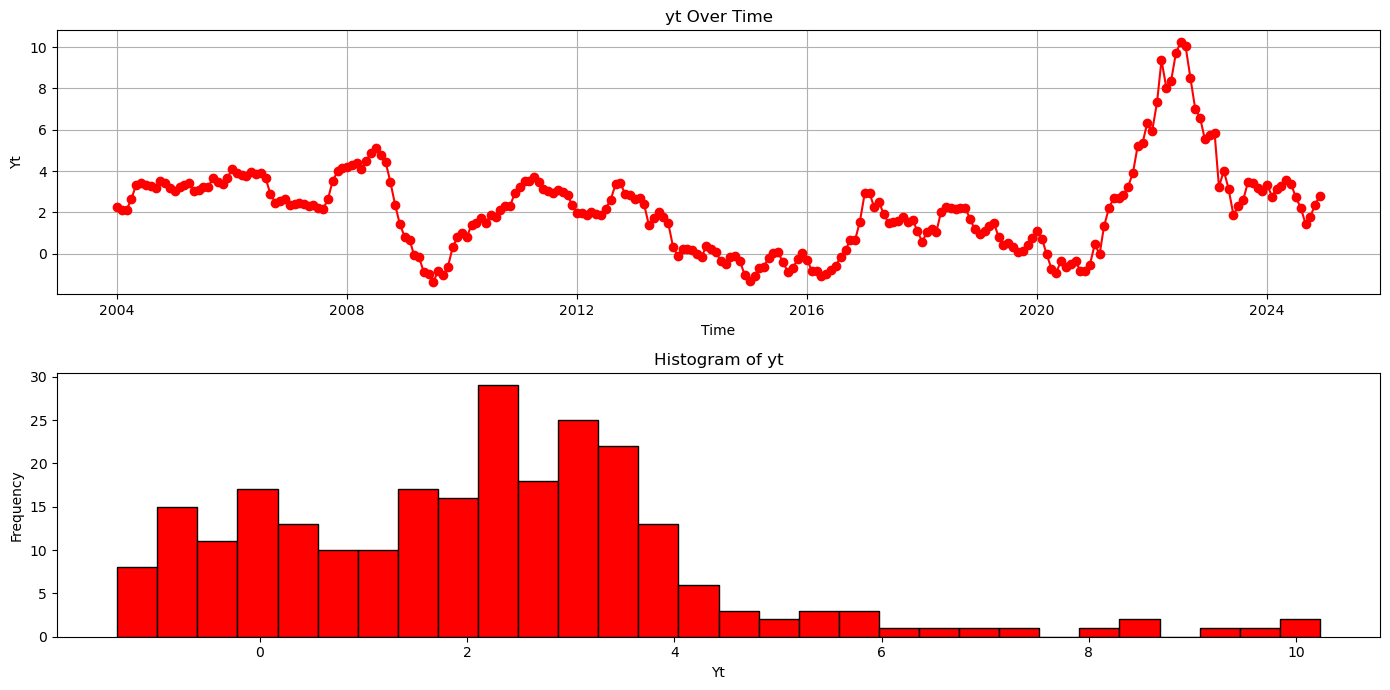

In [11]:
### Check seasonality patterns

# Calculate the monthly inflation
data['log_P'] = 100 * (np.log(data['index_general']) - np.log(data['index_general'].shift(12)))

data["log_P"] = np.log(data["index_general"])  # Compute log of price index
data["yt"] = 100 * (data["log_P"] - data["log_P"].shift(12))  # Compute annual inflation

# Drop the first 12 rows as they will have NaN values due to shifting
data.dropna(subset=["yt"], inplace=True)

plot_inflation(data, 'yt')

In [22]:
# Perform the Dickey-Fuller test
result = adfuller(data['yt'])

# Extract and print the test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Perform the Dickey-Fuller test
result = adfuller(data['yt'].diff().dropna())

# Extract and print the test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -2.8473837602260703
p-value: 0.05181760178415704
ADF Statistic: -5.615668035991246
p-value: 1.1759809763020004e-06


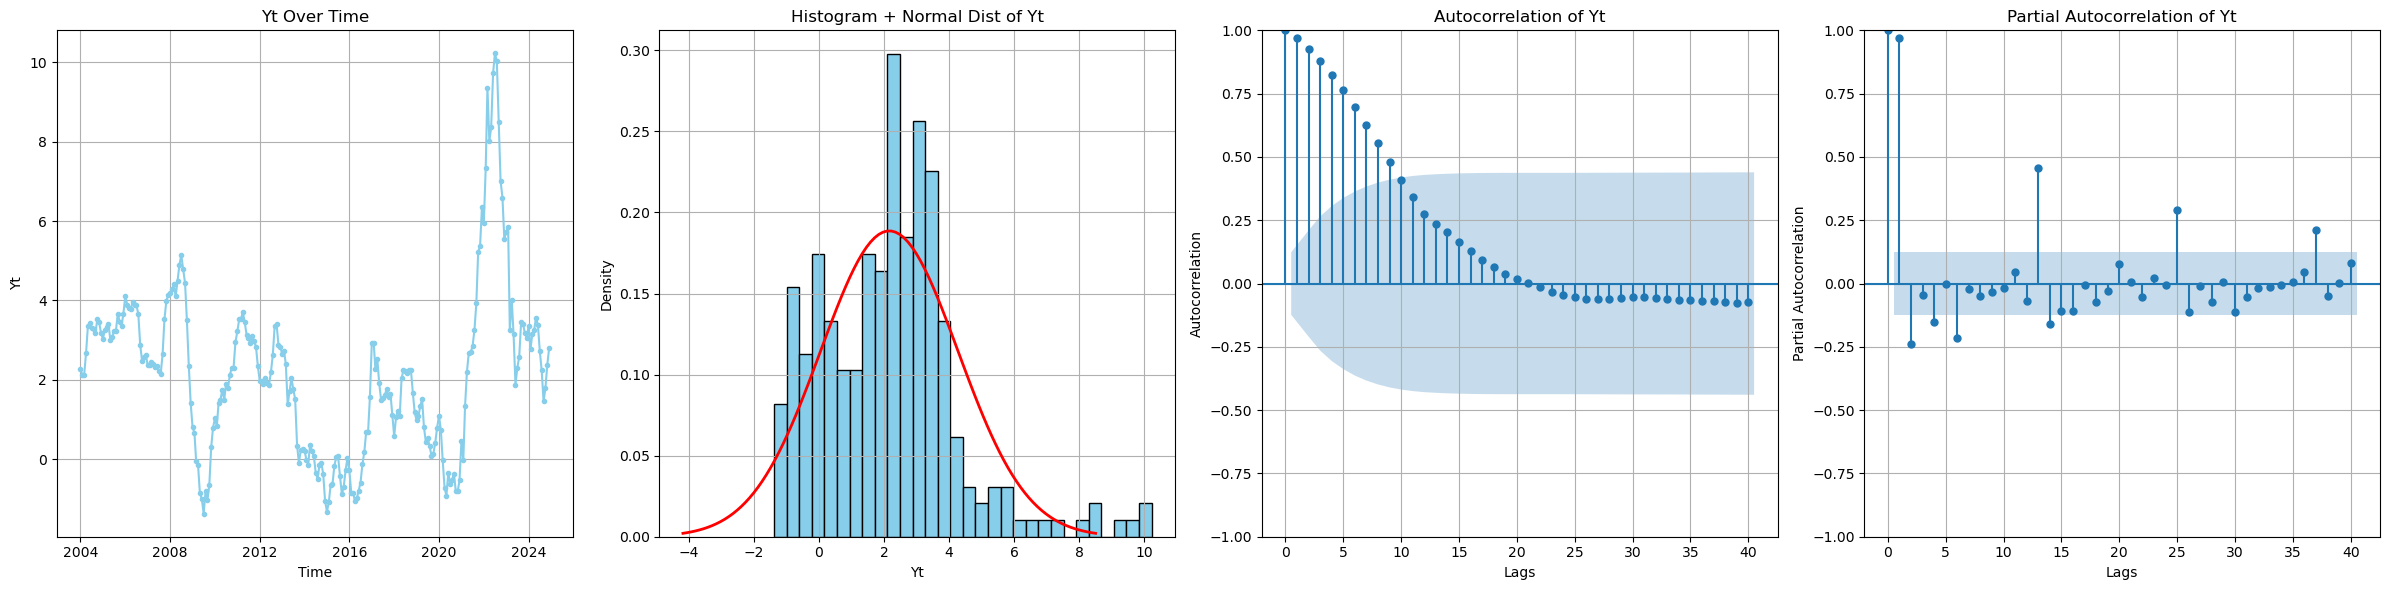

In [23]:
plot_eda2(data,'yt')

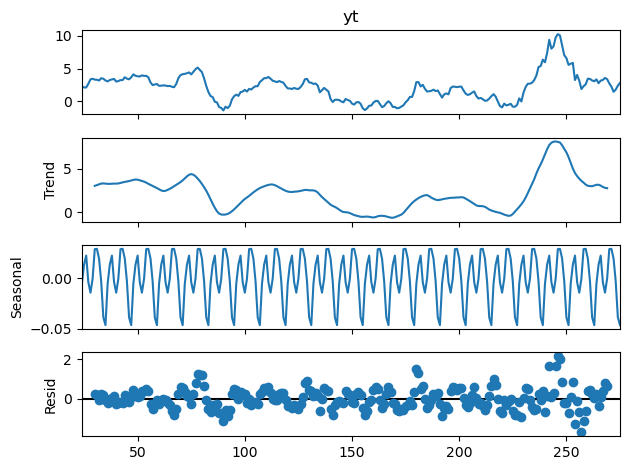

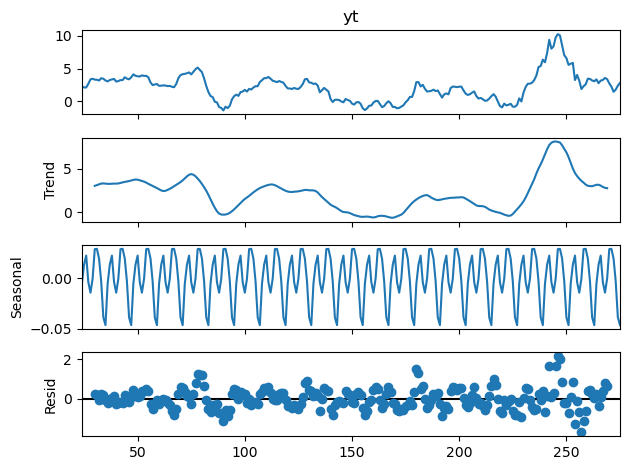

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data['yt'], model='additive', period=12)
result.plot()

In [38]:
# Define SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model = SARIMAX(data['yt'], 
                       order=(1,1,1),          # (p,d,q) - ARIMA part
                       seasonal_order=(0,0,1,12),  # (P,D,Q,s) - Seasonal part, s=12 for yearly seasonality
                       enforce_stationarity=False, 
                       enforce_invertibility=False)

# Fit model
sarima_results = sarima_model.fit()

# Print model summary
print(sarima_results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                 yt   No. Observations:                  252
Model:             SARIMAX(1, 1, 1)x(0, 0, 1, 12)   Log Likelihood                -125.150
Date:                            Tue, 11 Mar 2025   AIC                            258.299
Time:                                    22:33:53   BIC                            272.172
Sample:                                         0   HQIC                           263.891
                                            - 252                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7966      0.083      9.607      0.000       0.634       0.959
ma.L1         -0.6179      0.115   

c:\Users\flore\anaconda3\envs\pyomo_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\flore\anaconda3\envs\pyomo_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


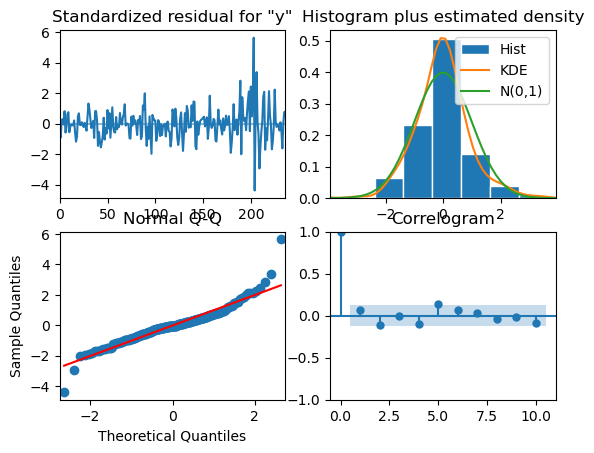

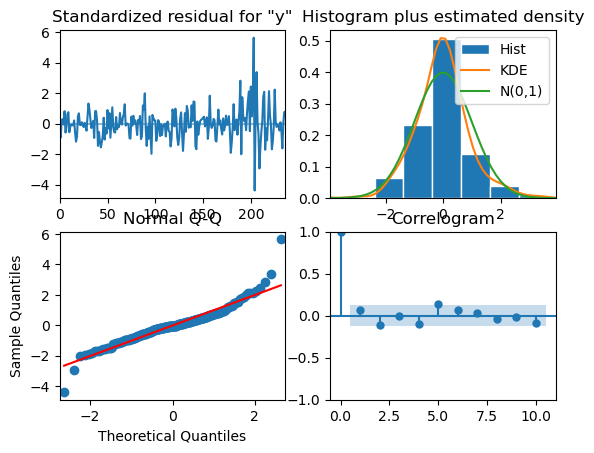

In [39]:
sarima_results.plot_diagnostics()

In [24]:
from pmdarima import auto_arima

auto_model = auto_arima(data["yt"], seasonal=False, trace=True, stepwise=True)
print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=377.957, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1274.405, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=390.073, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=380.787, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=377.162, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=378.847, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=378.117, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.20 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=379.799, Time=0.04 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.23 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=371.083, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=376.608, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=375.501, Time=0.04 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 s

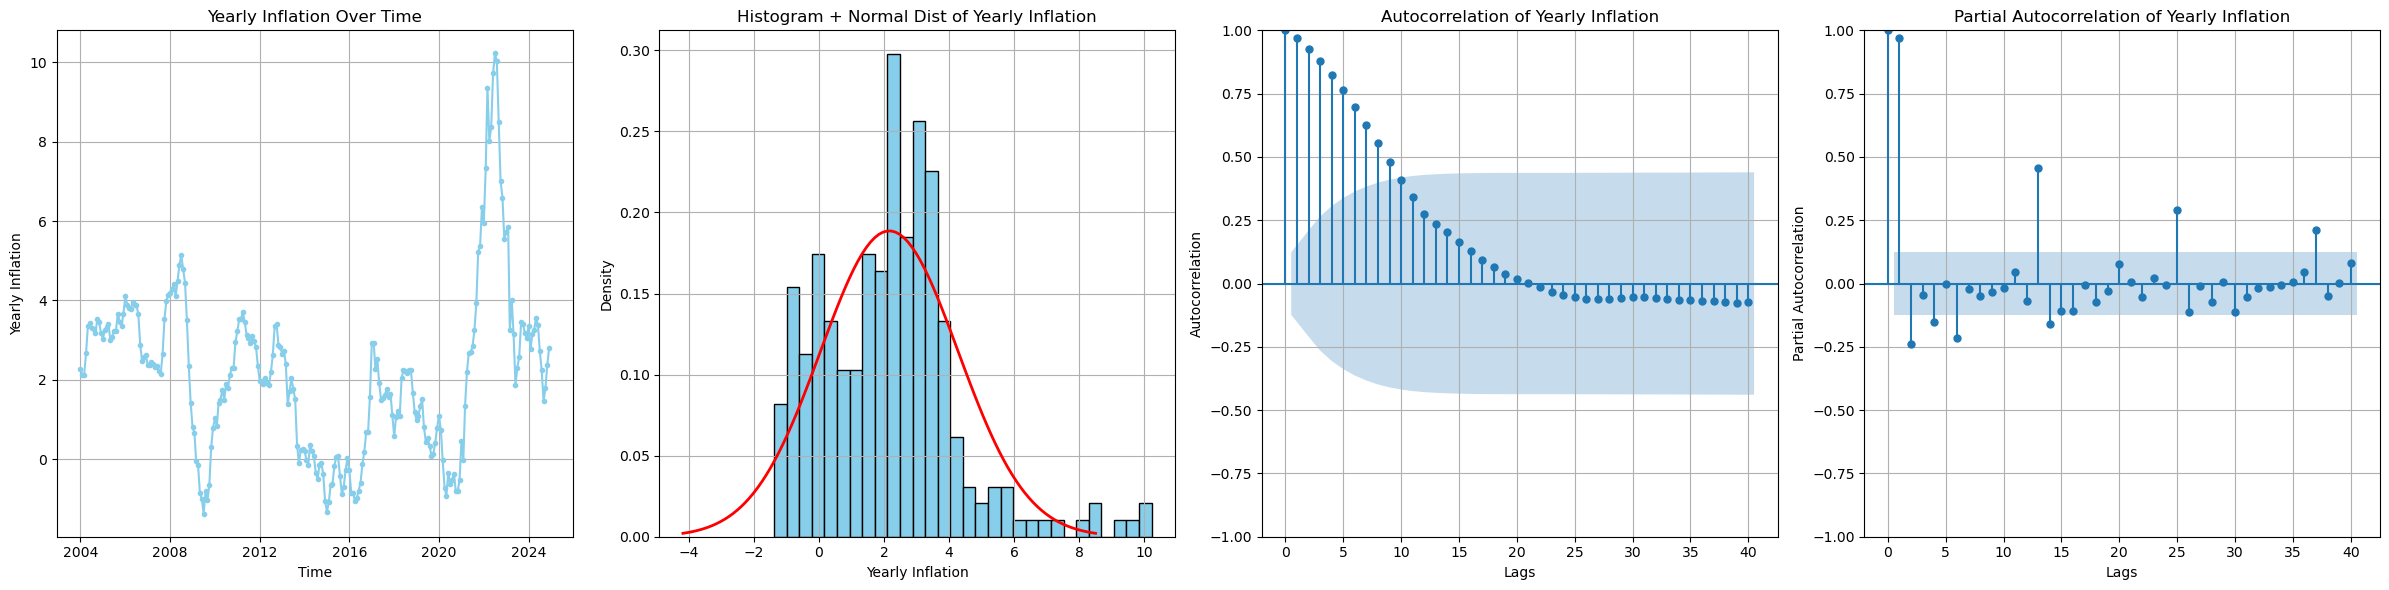

In [12]:
plot_eda2(data,"yearly_inflation")

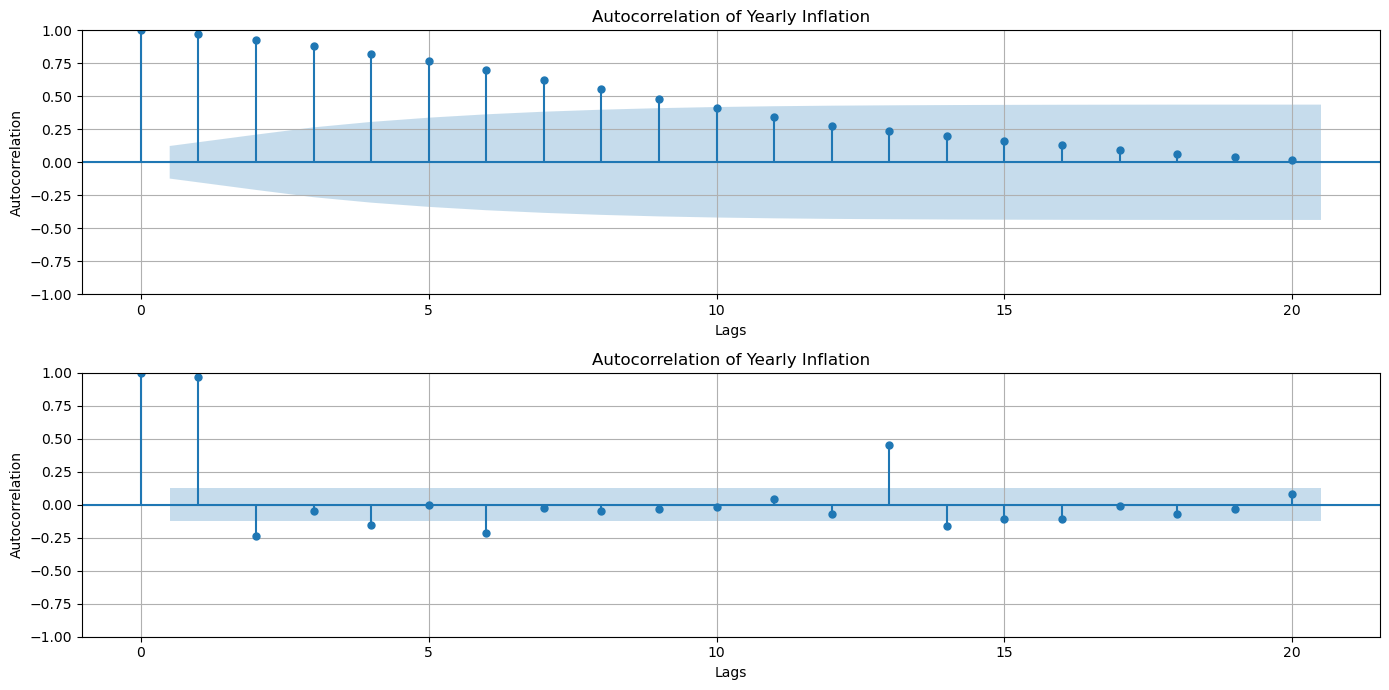

In [13]:
plot_acf_pacf(data,"yearly_inflation",20)

In [14]:
# Perform the Dickey-Fuller test
result = adfuller(data['yearly_inflation'])

# Extract and print the test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Perform the Dickey-Fuller test
result = adfuller(data['yearly_inflation'].diff().dropna())

# Extract and print the test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -2.8473837602260703
p-value: 0.05181760178415704
ADF Statistic: -5.615668035991246
p-value: 1.1759809763020004e-06


# Models

AR(1)

In [15]:
def ar_test_model(data, feature, p=1, dif=0 ,q=0):
    # Fit the ARIMA model
    model = ARIMA(data[feature], order=(p, dif, q))
    model_fit = model.fit()
    
    print(model_fit.summary())
    
    # Plot diagnostics in a single row
    fig = model_fit.plot_diagnostics(figsize=(20, 5))
    
    for i, ax in enumerate(fig.axes):
        ax.set_position([0.05 + i * 0.27, 0.15, 0.23, 0.75])  # Adjust subplot positions
    
    plt.show()
    
    return model_fit



                               SARIMAX Results                                
Dep. Variable:       yearly_inflation   No. Observations:                  252
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -191.345
Date:                Tue, 11 Mar 2025   AIC                            388.689
Time:                        22:18:24   BIC                            399.277
Sample:                             0   HQIC                           392.950
                                - 252                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2327      1.077      2.073      0.038       0.122       4.344
ar.L1          0.9666      0.011     90.233      0.000       0.946       0.988
sigma2         0.2645      0.014     18.389      0.0

c:\Users\flore\anaconda3\envs\pyomo_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\flore\anaconda3\envs\pyomo_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\flore\anaconda3\envs\pyomo_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


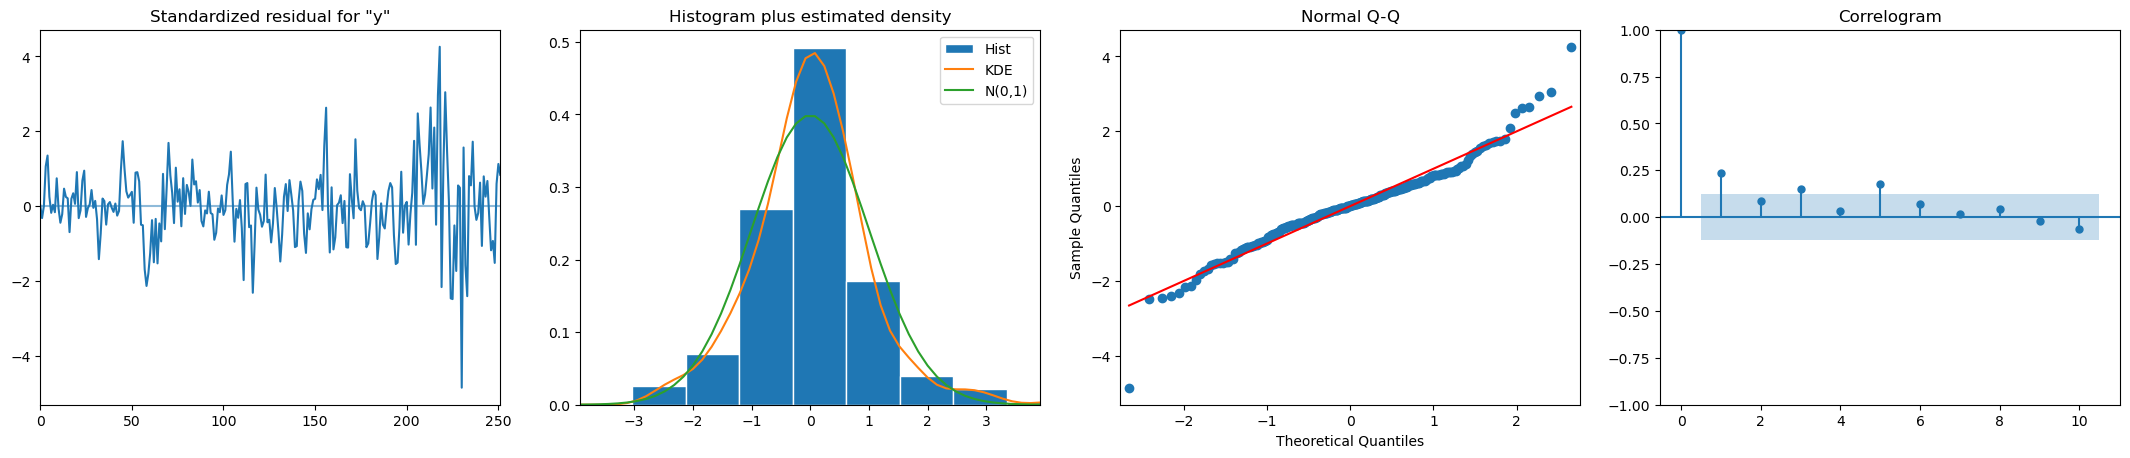

In [16]:
model_ar_1 = ar_test_model(data,"yearly_inflation",p=1)

c:\Users\flore\anaconda3\envs\pyomo_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\flore\anaconda3\envs\pyomo_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\flore\anaconda3\envs\pyomo_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:       yearly_inflation   No. Observations:                  252
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -183.750
Date:                Tue, 11 Mar 2025   AIC                            375.501
Time:                        22:18:25   BIC                            389.619
Sample:                             0   HQIC                           381.182
                                - 252                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2246      0.886      2.510      0.012       0.488       3.961
ar.L1          1.2014      0.037     32.900      0.000       1.130       1.273
ar.L2         -0.2413      0.038     -6.349      0.0

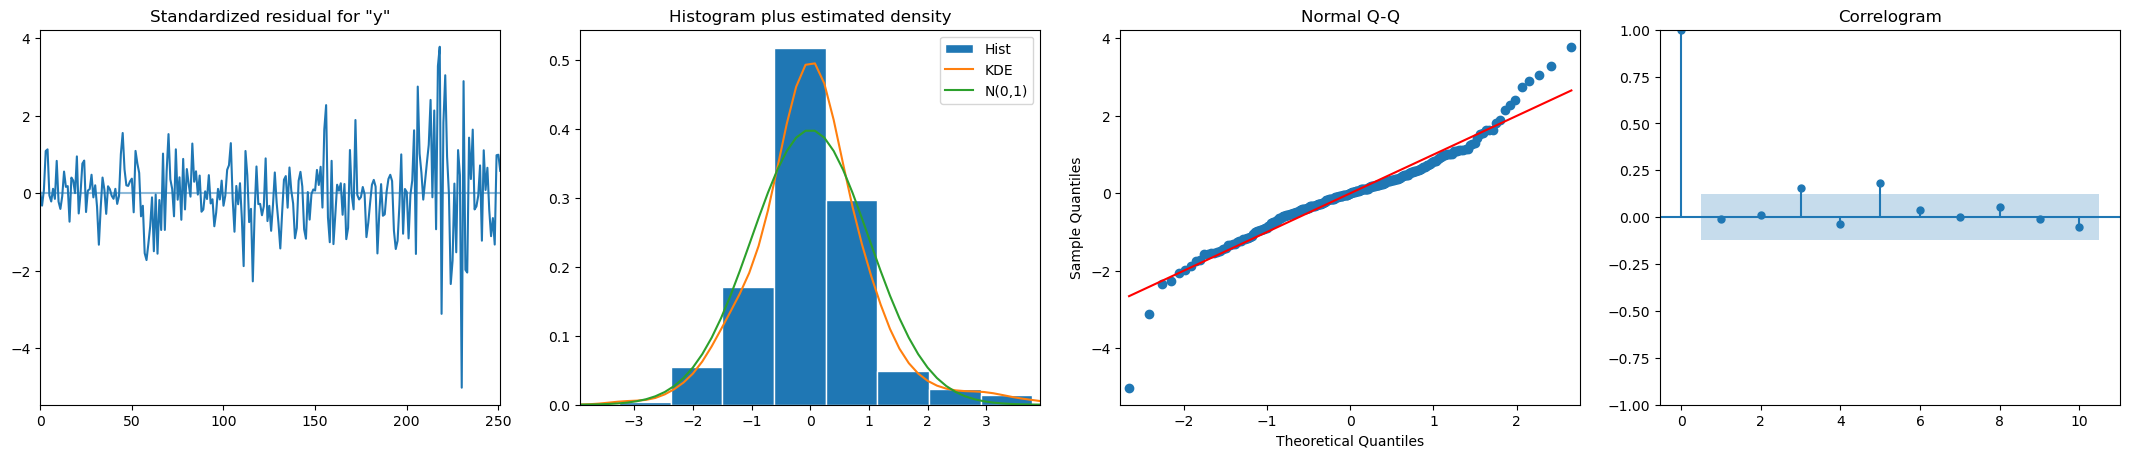

In [17]:
model_ar_2 = ar_test_model(data,"yearly_inflation",p=2)

c:\Users\flore\anaconda3\envs\pyomo_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\flore\anaconda3\envs\pyomo_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\flore\anaconda3\envs\pyomo_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\flore\anaconda3\envs\pyomo_env\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\flore\anaconda3\envs\pyomo_env\Lib\site-packages\statsmodels\tsa\

                               SARIMAX Results                                
Dep. Variable:                     yt   No. Observations:                  252
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -171.589
Date:                Tue, 11 Mar 2025   AIC                            353.177
Time:                        22:28:43   BIC                            370.804
Sample:                             0   HQIC                           360.271
                                - 252                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0162      0.153     -0.106      0.916      -0.316       0.284
ar.L2          0.5877      0.100      5.903      0.000       0.393       0.783
ma.L1          0.3593      0.504      0.712      0.4

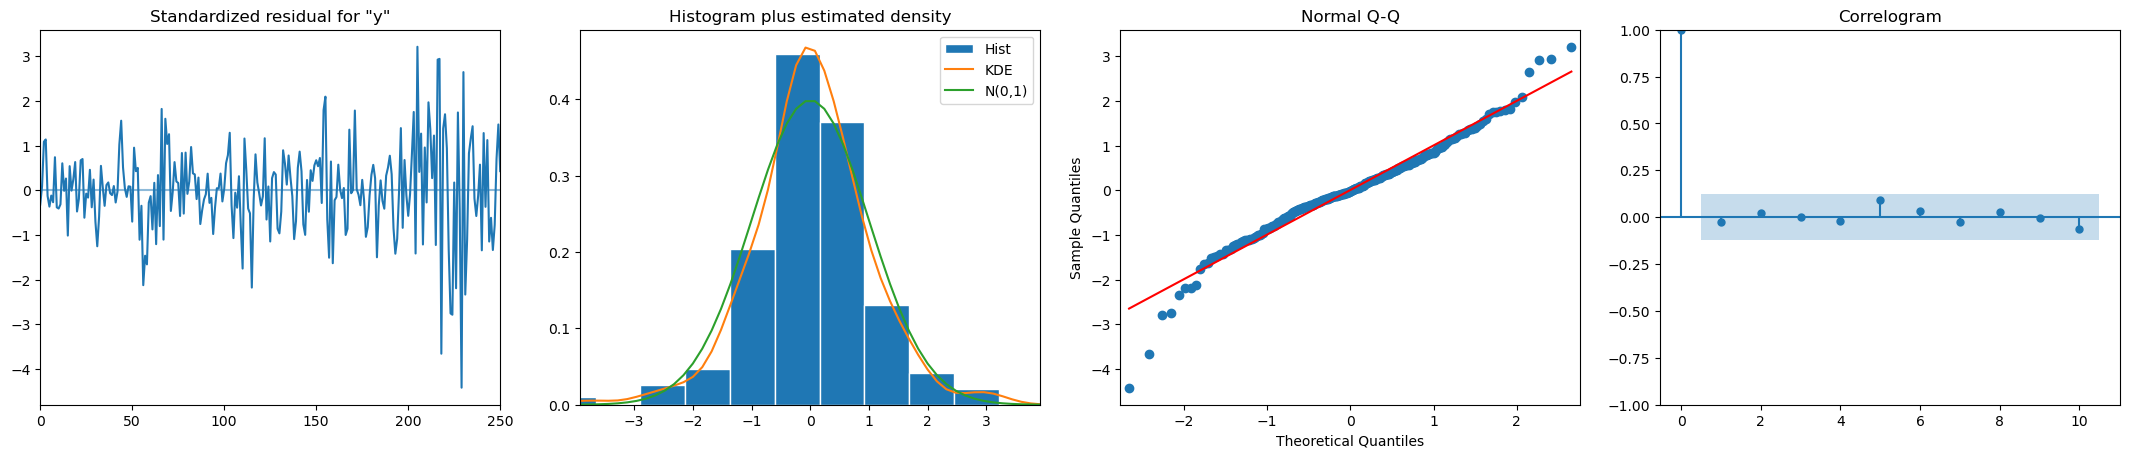

In [34]:
ar_test_model(data,"yt",p =2,dif=1,q=2)

In [26]:
from pmdarima import auto_arima

auto_model = auto_arima(data["yearly_inflation"], seasonal=True, trace=True, stepwise=True)
print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=371.756, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1095.696, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=388.689, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1274.405, Time=0.00 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=378.464, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=371.083, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=376.608, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=375.501, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=376.893, Time=0.07 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=377.162, Time=0.06 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 1.190 seconds
                               SARIMAX Result

c:\Users\flore\anaconda3\envs\pyomo_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\flore\anaconda3\envs\pyomo_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\flore\anaconda3\envs\pyomo_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                     yt   No. Observations:                  252
Model:                 ARIMA(3, 2, 0)   Log Likelihood                -204.219
Date:                Tue, 11 Mar 2025   AIC                            416.437
Time:                        22:25:17   BIC                            430.523
Sample:                             0   HQIC                           422.106
                                - 252                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5975      0.043    -13.756      0.000      -0.683      -0.512
ar.L2         -0.4350      0.053     -8.233      0.000      -0.539      -0.331
ar.L3         -0.1349      0.057     -2.352      0.0

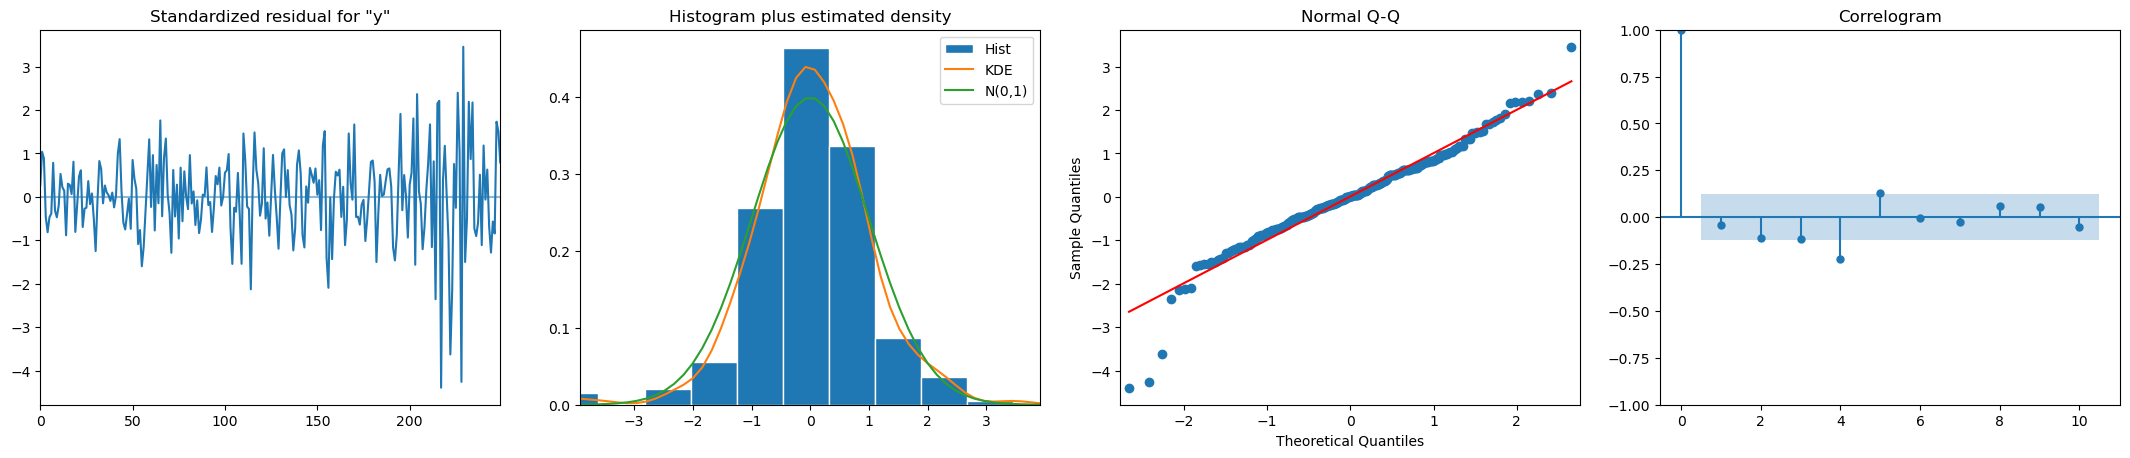

In [32]:
ar_test_model(data,"yt",p=3,dif=2,q=0)

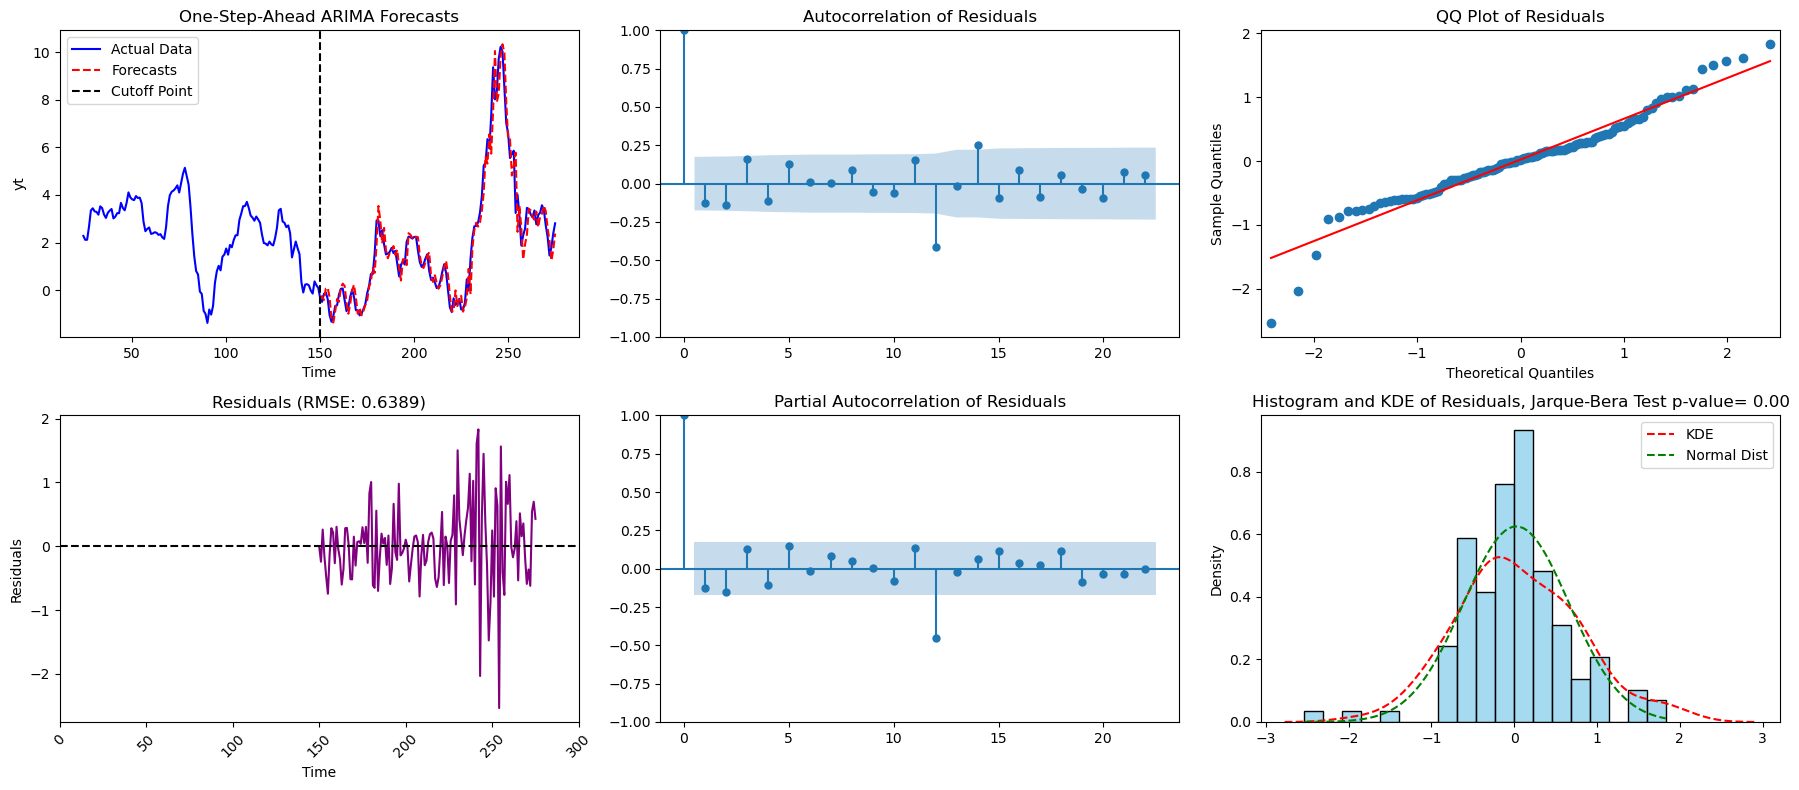

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import seaborn as sns

def one_step_ahead_forecast(data, feature, order, cutoff):
    """
    Generates one-step-ahead forecasts for an ARIMA model starting from a given cutoff point.
    
    Parameters:
    - data: DataFrame containing the time series data.
    - feature: The column name of the feature to model.
    - order: Tuple (p, d, q) specifying the ARIMA order.
    - cutoff: Index or timestamp to start forecasting from.
    
    Returns:
    - A DataFrame containing forecasts, true values, and residuals.
    """
    if cutoff not in data.index:
        raise ValueError("Cutoff point must be a valid index in the data.")
    
    forecasts = []
    history = data[feature].loc[:cutoff].tolist()
    history_empty = []
    future_index = data.loc[cutoff:].index
    
    residuals = []
    
    for t in range(len(future_index)):
        model = ARIMA(history, order=order)
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=1)[0]  # One-step-ahead forecast
        forecasts.append(forecast)
        actual_value = data[feature].loc[future_index[t]]
        history.append(actual_value)  # Append actual value
        history_empty.append(actual_value)
        residuals.append(actual_value - forecast)
    
    forecast_series = pd.Series(forecasts, index=future_index)
    residuals_series = pd.Series(residuals, index=future_index)

    # Create a DataFrame from forecast_series and residuals_series
    forecast_residuals_df = pd.DataFrame({
        'Forecast': forecast_series,
        'True Value': history_empty,
        'Residuals': residuals_series
    })

    # Compute RMSE from residuals_series
    rmse = np.sqrt(np.mean(residuals_series**2))
    
    # Plot the results
    fig, axes = plt.subplots(2, 3, figsize=(18, 8))
    
    # Forecast plot
    axes[0, 0].plot(data[feature], label="Actual Data", color="blue")
    axes[0, 0].plot(forecast_series, label="Forecasts", color="red", linestyle="dashed")
    axes[0, 0].axvline(x=cutoff, color="black", linestyle="--", label="Cutoff Point")
    axes[0, 0].legend()
    axes[0, 0].set_title("One-Step-Ahead ARIMA Forecasts")
    axes[0, 0].set_xlabel("Time")
    axes[0, 0].set_ylabel(feature)
    
    # Residuals plot
    axes[1, 0].plot(residuals_series, color="purple")
    axes[1, 0].axhline(y=0, color='black', linestyle='--')
    axes[1, 0].set_title(f"Residuals (RMSE: {rmse:.4f})")
    axes[1, 0].set_xlabel("Time")
    axes[1, 0].set_ylabel("Residuals")
    axes[1, 0].set_xticks(axes[0, 0].get_xticks())  # Align x ticks
    axes[1, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)
    
    # ACF plot
    sm.graphics.tsa.plot_acf(residuals_series, ax=axes[0, 1])
    axes[0, 1].set_title("Autocorrelation of Residuals")
    
    # PACF plot
    sm.graphics.tsa.plot_pacf(residuals_series, ax=axes[1, 1])
    axes[1, 1].set_title("Partial Autocorrelation of Residuals")
    
    # Residual normality plot
    jb_test = sm.stats.jarque_bera(residuals_series)

    sm.qqplot(residuals_series, line='s', ax=axes[0, 2])
    axes[0, 2].set_title("QQ Plot of Residuals")
    
    # Histogram and KDE of residuals
    sns.histplot(residuals_series, kde=False, ax=axes[1, 2], stat="density", color="skyblue")
    sns.kdeplot(np.random.normal(np.mean(residuals_series), np.std(residuals_series), len(residuals_series)), ax=axes[1, 2], color="red", linestyle="--", label="KDE")
    sample_mean = np.mean(residuals_series)
    sample_var = np.var(residuals_series)
    x = np.linspace(min(residuals_series), max(residuals_series), 100)
    y = (1 / (np.sqrt(2 * np.pi * sample_var))) * np.exp(-0.5 * ((x - sample_mean) ** 2 / sample_var))
    axes[1, 2].plot(x, y, color="green", linestyle="--", label="Normal Dist")

    axes[1, 2].set_title(f"Histogram and KDE of Residuals, Jarque-Bera Test p-value= {jb_test[1]:.2f}")
    
    
    axes[1, 2].legend()

    plt.tight_layout()
    plt.show()
    
    return forecast_residuals_df


forecast_residuals_df = one_step_ahead_forecast(data = data, feature = "yt" , order = (2,0,1), cutoff=data.index[data.index.get_loc(150)])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.

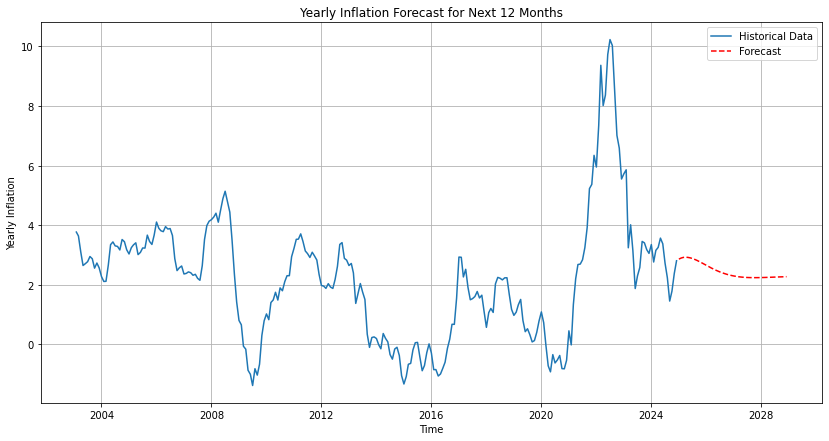

,yearly_inflation
2025-01-01,2.862610
2025-02-01,2.899191
2025-03-01,2.919460
2025-04-01,2.925697
2025-05-01,2.920056
2025-06-01,2.904542
2025-07-01,2.881009
2025-08-01,2.851148
2025-09-01,2.816483
2025-10-01,2.778378


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

def predict_next_12_months(data, feature, order,future_steps=12):
    """
    Predicts the next 12 months using an ARIMA model and plots the results.
    
    Parameters:
    - data: DataFrame containing the time series data.
    - feature: The column name of the feature to model.
    - order: Tuple (p, d, q) specifying the ARIMA order.
    
    Returns:
    - A DataFrame containing the original data and the predictions.
    """
    # Ensure time column is datetime format
    data = data.copy()
    data['time'] = pd.to_datetime(data['time'])
    data.set_index('time', inplace=True)

    # Drop missing values
    data = data[[feature]].dropna()

    # Fit the ARIMA model
    model = ARIMA(data[feature], order=order)
    model_fit = model.fit()
    
    # Forecast the next 12 months
    forecast = model_fit.forecast(steps=future_steps, typ='levels')

    # Create a DataFrame for the forecast
    forecast_index = pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=future_steps, freq='MS')
    forecast_df = pd.DataFrame({feature: forecast}, index=forecast_index)

    # Plot the results
    plt.figure(figsize=(14, 7))
    plt.plot(data.index, data[feature], label='Historical Data')
    plt.plot(forecast_df.index, forecast_df[feature], label='Forecast', color='red', linestyle='dashed')
    plt.xlabel('Time')
    plt.ylabel(feature.replace('_', ' ').title())
    plt.title(f'{feature.replace("_", " ").title()} Forecast for Next 12 Months')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return forecast_df

# Example usage
forecast_df = predict_next_12_months(data, 'yearly_inflation', order=(2, 0, 1),future_steps=48)
forecast_df


In [ ]:
forecast_df

,yearly_inflation
2025-01-01,NaN
2025-02-01,NaN
2025-03-01,NaN
2025-04-01,NaN
2025-05-01,NaN
2025-06-01,NaN
2025-07-01,NaN
2025-08-01,NaN
2025-09-01,NaN
2025-10-01,NaN
